In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [11]:
# Load the uploaded CSV
df = pd.read_csv(r"C:\Users\workk\Downloads\AABA_2006-01-01_to_2018-01-01.csv")

# Display columns and first rows
print(df.columns)
print(df.head())


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')
         Date   Open   High    Low  Close    Volume  Name
0  2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA
1  2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA
2  2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA
3  2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA
4  2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA


In [12]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Keep only Close price and drop missing
df = df[['Close']].dropna()

# Sort by date just in case
df.sort_index(inplace=True)

# Check row count
print("Total rows:", len(df))


Total rows: 3019


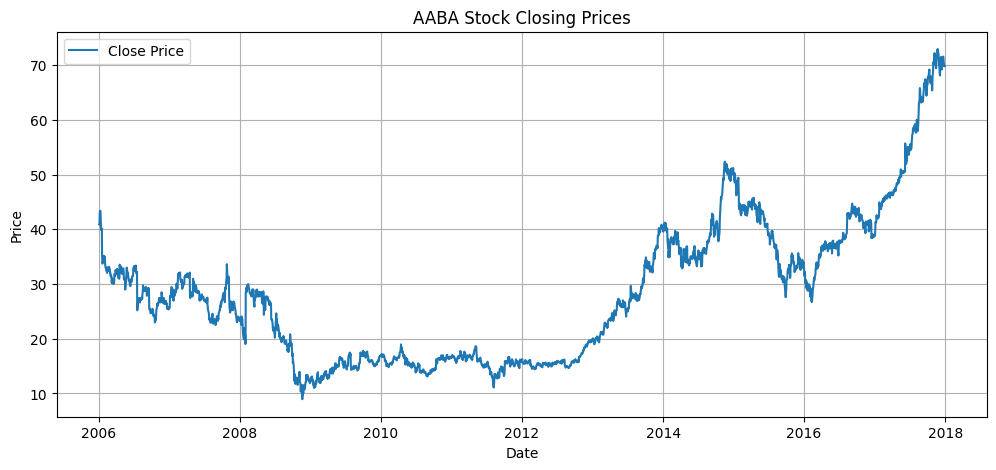

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price')
plt.title("AABA Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()


In [14]:
# Use last 90 days for testing
if len(df) < 120:
    raise ValueError("Not enough data for ARIMA. You need at least 120 rows.")

train = df['Close'][:-90]
test = df['Close'][-90:]


In [15]:
model = ARIMA(train, order=(5, 1, 0))  # You can tune this later
model_fit = model.fit()


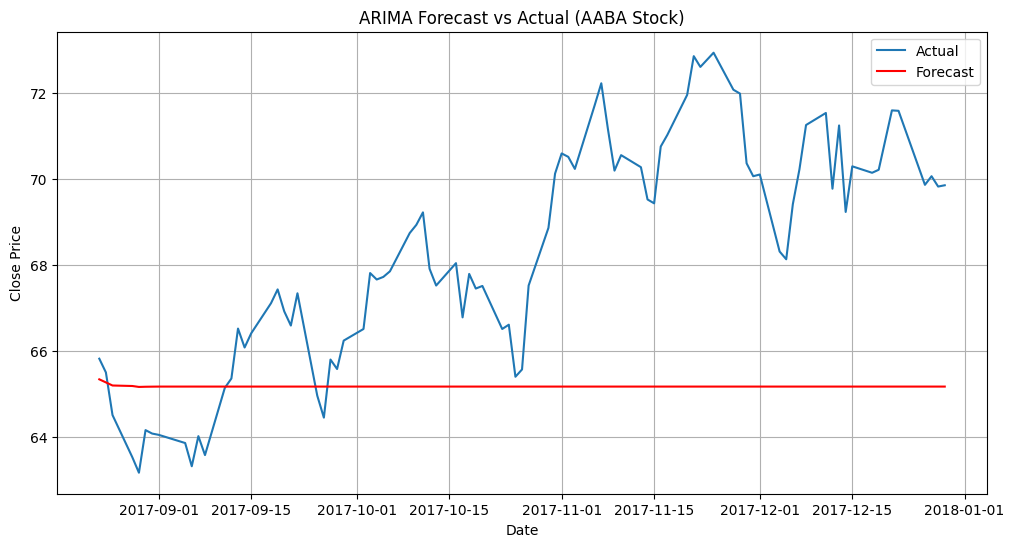

In [16]:
forecast = model_fit.forecast(steps=90)

plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast vs Actual (AABA Stock)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test.values - forecast) / test.values)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 3.43
RMSE: 4.06
MAPE: 4.92%
